In [2]:
pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [46]:
import pandas as pd
import gdown

class Mamdani_FIS:
    def __init__(self, numberOfMembershipFunctionInput=5, numberOfMembershipFunctionOutput=9, maxOfVelocity=120, maxOfDistance=1000, maxOfPedal=45):
        self.numberOfMembershipFunctionInput = numberOfMembershipFunctionInput
        self.numberOfMembershipFunctionOutput = numberOfMembershipFunctionOutput
        self.maxOfVelocity = maxOfVelocity
        self.maxOfDistance = maxOfDistance
        self.maxOfPedal = maxOfPedal
        self.data = self.get_data()

    def get_data(self):
        url = 'https://drive.google.com/uc?id=1dlvS7Kb-0pYXP3_719yulbF6JG8PtU57'
        file_path = 'Updated_Fuzzy_Rules.xlsx'
        gdown.download(url, file_path, quiet=False)
        return pd.read_excel(file_path)

    def get_parameters_MFs(self, numberOfMFs, maxValue):
        step = maxValue / (numberOfMFs - 1)
        parameters_MFs = []
        for i in range(numberOfMFs):
            if i == 0:
                index = [0, 0, step]
            elif i == numberOfMFs - 1:
                index = [(i - 1) * step, i * step, i * step]
            else:
                index = [(i - 1) * step, i * step, (i + 1) * step]
            parameters_MFs.append(index)
        return parameters_MFs

    def triangular(self, x, listParameters):
        a, b, c = listParameters
        if a <= x <= b:
            return (x - a) / (b - a)
        elif b < x <= c:
            return (c - x) / (c - b)
        else:
            return 0.0

    def display_rules_table(self):
        # Use this method to display the rules table directly without additional formatting
        return self.data

# Create an instance of Mamdani_FIS
fis = Mamdani_FIS()

# Directly display the DataFrame
print(fis.display_rules_table())


Downloading...
From: https://drive.google.com/uc?id=1dlvS7Kb-0pYXP3_719yulbF6JG8PtU57
To: /content/Updated_Fuzzy_Rules.xlsx
100%|██████████| 7.75k/7.75k [00:00<00:00, 11.0MB/s]

     Velocity Index  Distance Index  Pedal Index
0                 1               1            1
1                 1               2            2
2                 1               3            3
3                 1               4            4
4                 1               5            5
5                 1               6            6
6                 1               7            7
7                 1               8            8
8                 1               9            9
9                 1              10           10
10                1              11           11
11                1              12           12
12                1              13           13
13                2               1           14
14                2               2           15
15                2               3           16
16                2               4           17
17                2               5           18
18                2               6           19
19                2 

[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.

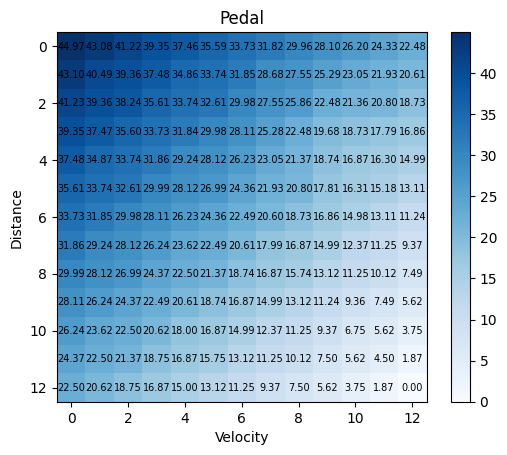

In [45]:
import numpy as np
import matplotlib.pyplot as plt

num=13

samplesVelocity = np.linspace(0.1, maxOfVelocity, num)
samplesDistance = np.linspace(0.1, maxOfDistance, num)

matrix = np.random.rand(num, num)

for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      # print(i,j)
      matrix[i, j] = fis.get_output(samplesVelocity[i], samplesDistance[j])

# Define maximum value
max_value = np.max(matrix)

# Create a new figure and axis
fig, ax = plt.subplots()

# Create a heatmap
heatmap = ax.imshow(matrix, cmap='Blues')

# Add color bar
cbar = plt.colorbar(heatmap)


# Iterate over each cell to annotate the value
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='black',fontsize=7)

plt.title('Pedal')
plt.xlabel('Velocity')
plt.ylabel('Distance')

# Show plot
plt.show()
